# Intoduction to Statistical Tests

This training module was developed by Dr. Kyle Roell, Alexis Payton, MS, and Dr. Julia E. Rager

Fall 2023

## Introduction to Training Module

This training module provides a brief introduction to some of the most commonly implemented statistics and associated visualizations used in exposure science, toxicology, and environmental health studies. This module first uploads an example dataset that is similar to the data used in [TAME 2.0 Module 2.3 Data Manipulation & Reshaping](insert link), though includes some expanded subject information data to allow for more example statistical tests. Then, methods to evaluate data normality are presented, including visualization-based and statistical-based approaches. 

Basic statistical tests discussed in this module include: 
+ T test
+ Analysis of Variance (ANOVA) with a Tukey's Post-Hoc test
+ Regression Modeling (Linear and Logistic)
+ Chi-squared test
+ Fischer’s exact test

These statistical tests are very simple, with more extensive examples and associated descriptions of statistical models in the proceeding applications-based training modules.

### Script Preparations#### Cleaning the global environment

In [1]:
rm(list=ls())

#### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [ ]:
if (!requireNamespace("tidyverse"))
  install.packages("tidyverse");
if (!requireNamespace("ggpubr"))
  install.packages("ggpubr");
if(!requireNamespace("effects"))
  install.packages("effects");

#### Loading R packages required for this session

In [2]:
library(tidyverse) # all tidyverse packages, including dplyr and ggplot2
library(ggpubr) # ggplot2 based plots
library(effects) # for linear modeling
library(multcomp)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



#### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

#### Importing example datasets

Let's read in our example dataset. Note that these data are similar to those used previously, except that demographic and chemical measurement data were previously merged, and a few additional columns of subject information/demographics were added to serve as more thorough examples of data for use in this training module.

In [3]:
# Loading data
full.data <- read.csv("Module3_4/Module3_4_FullDemoChemData.csv")

Let's view the top of the first 9 columns of data in this dataframe:

In [4]:
full.data[1:10,1:9]

,ID,BMI,BMIcat,MAge,MEdu,BW,GA,Smoker,Smoker3
,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>
1,1,27.7,Overweight,22.99928,College_Degree,3180.058,34,NS,Never
2,2,26.8,Overweight,30.05142,College_Degree,3210.823,43,S,Never
3,3,33.2,Overweight,28.04660,College_Degree,3311.551,40,NS,Never
4,4,30.1,Overweight,34.81796,College_Degree,3266.844,32,S,Never
5,5,37.4,Overweight,42.68440,College_Degree,3664.088,35,NS,Never
6,6,33.3,Overweight,24.94960,College_Degree,3328.988,40,NS,Never
7,7,24.8,Overweight,29.54798,College_Degree,3061.949,30,NS,Never
8,8,16.9,Underweight,24.94954,College_Degree,3332.539,38,NS,Current
9,9,36.9,Overweight,33.58589,College_Degree,3260.482,39,NS,Never


These represent the subject information/demographic data, which include the following columns:
  
+ ID (subject number)
+ BMI (body mass index)
+ BMIcat (BMI <= 18.5 binned as "Underweight"; 18.5 < BMI <= 24.5 binned as "Normal"; BMI > 24.5 binned as "Overweight")
+ MAge (maternal age, years)
+ MEdu (maternal education, "No_HS_Degree" = "less than high school"; "No_College_Degree" = "high school or some college"; "College_Degree" = "college or greater")
+ BW (body weight, grams)
+ GA (gestational age, week)
+ Smoker ("NS" = non-smoker; "S" = smoker)
+ Smoker3 ("Never", "Former", or "Current" smoking status)

<br>
Let's now view the remaining columns (columns 10-15) in this dataframe:

In [5]:
full.data[1:10,10:15]

,DWAs,DWCd,DWCr,UAs,UCd,UCr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.426464,1.292941,51.67987,10.192695,0.7537104,42.60187
2,7.832384,1.798535,50.10409,11.815088,0.9789506,41.30757
3,7.516569,1.288461,48.74001,10.079057,0.1903262,36.47716
4,5.906656,2.075259,50.92745,8.719123,0.9364825,42.47987
5,7.181873,2.762643,55.16882,9.436559,1.4977829,47.78528
6,9.723429,3.054057,51.14812,11.589403,1.6645837,38.26386
7,6.268547,1.218410,52.08578,8.887948,0.6347667,39.45535
8,6.718448,1.414975,54.96740,9.304968,0.6658849,45.09987
9,9.074928,2.727755,55.72826,10.818153,1.6585757,42.58577


These columns represent the environmental exposure measures, including:
  
+ DWAs (drinking water arsenic levels in µg/L)
+ DWCd (drinking water cadmium levels in µg/L)
+ DWCr (drinking water chromium levels in µg/L)
+ UAs (urinary arsenic levels in µg/L)
+ UCd (urinary cadmium levels in µg/L)
+ UCr (urinary chromium levels in µg/L)


Now that the script is prepared and the data are uploaded, we can start by asking some initial questions about the data that can be answered by running some basic statistical tests and visualizations.

## Training Module's Environmental Health Questions 
This training module was specifically developed to answer the following environmental health questions:
1. Are there statistically significant differences in BMI between non-smokers and smokers?
2. Are there statistically significant differences in BMI between current, former, and people who have never smoked?
3. Is there a relationship between maternal BMI and birth weight?
4. Are maternal age and gestational age considered to be potential covariates in the relationship between maternal BMI and birth weight?
5. Are there statistically significant differences in maternal education level based on whether they are a non-smoker or a smoker?
6. Is there a relationship between smoking status and BMI?

<br>

### Assessing Normality
When selecting the appropriate statistical tests to evaluate potential trends in your data, statistical test selection often relies upon whether or not the underlying data are normally distributed. Many statistical tests and methods that are commonly implemented in exposure science, toxicology, and environmental health research rely on assumptions of normality. Thus, one of the most common statistic tests to perform at the beginning of an analysis is a **test for normality**.As discussed in the previous module, there are a few ways to evaluate the normality of a dataset:*First*, you can visually gauge whether a dataset appears to be normally distributed through plots. For example, plotting data using histograms, densities, or Q-Q plots can graphically help inform if a variable's values appear to be normally distributed or not.*Second*, you can evaluate normality using statistical tests, such as the **Kolmogorov-Smirnov (K-S) test** and **Shapiro-Wilk test**. When using these tests and interpreting their results, it is important to remember that the null hypothesis is that the sample distribution is normal, and a significant p-value means the distribution is non-normal.<br>

Let's start with the first approach, based on data visualizations. In this module, we'll primarily be generating figures using the `ggpubr` package which is specifically designed to generate ggplot2-based figures using more streamlined coding syntax. In addition, this package has statistical parameters for plotting that are useful for basic statistical analysis. For further documentation on `ggpubr`, click [here](https://jtr13.github.io/cc20/brief-introduction-and-tutorial-of-ggpubr-package.html).

Let's begin with a [histogram](https://en.wikipedia.org/wiki/Histogram) to view the distribution of BMI data using the `gghistogram` function from the `ggpubr` package:

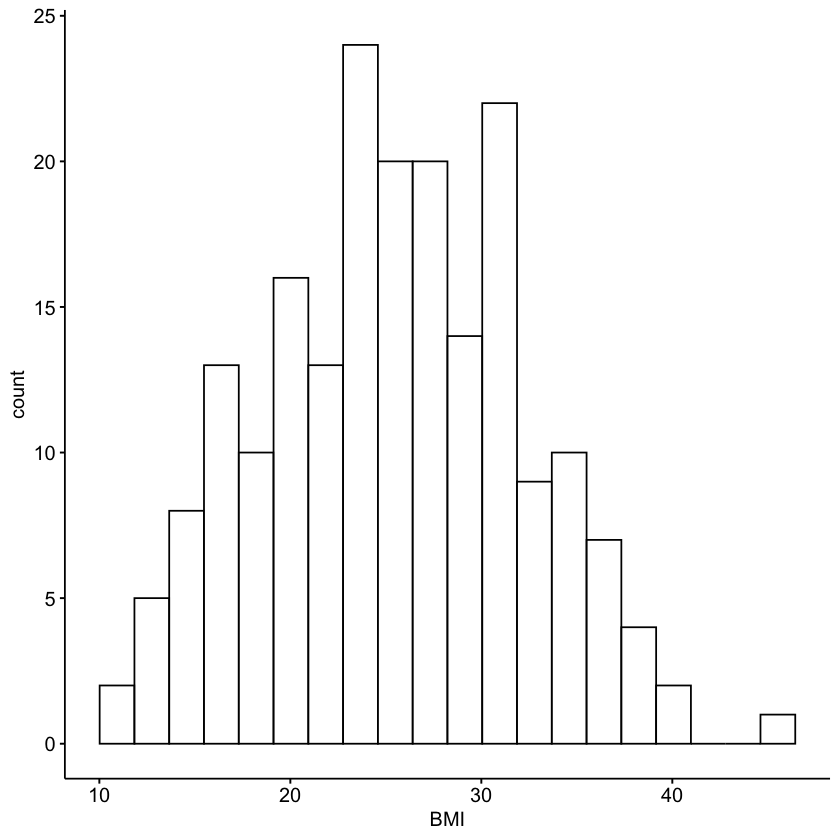

In [6]:
gghistogram(data = full.data, x = "BMI", bins = 20)

Let's also view the [Q–Q (quantile-quantile) plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) using the `ggqqplot` function also from the `ggpubr` package:

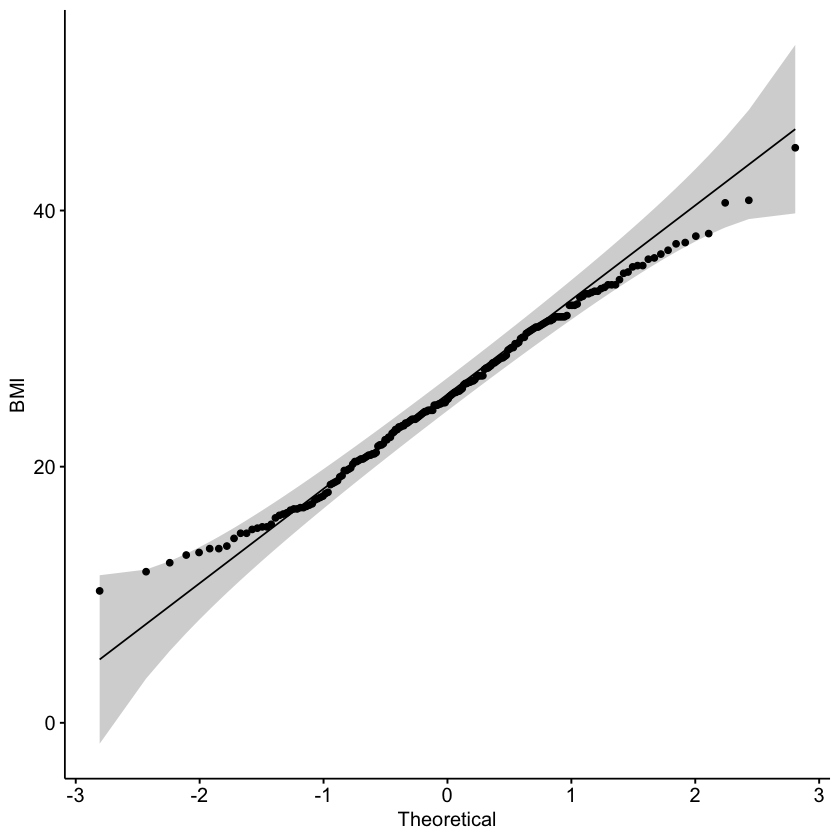

In [7]:
ggqqplot(full.data$BMI, ylab = "BMI")

From these visualizations, the BMI variable appears to be normally distributed, with data centered in the middle and spreading with a distribution on both the lower and upper sides that follow typical normal data distributions.

<br>

Let's now implement the second approach, based on statistical tests for normality. Here, let's use the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) as an example, again looking at the BMI data. 

In [8]:
shapiro.test(full.data$BMI)


	Shapiro-Wilk normality test

data:  full.data$BMI
W = 0.99232, p-value = 0.3773


This test resulted in a p-value of 0.3773, so cannot reject the null hypothesis (that the BMI data are normally distributed). This means that we can assume that these data are normally distributed.

<br>
## Two-Group Visualizations and Statistical Comparisons using the T-Test
T-tests are commonly used to test for a significant difference between the means of two groups in normally distributed data. In this example, we will be answering **Environmental Health Question 1**: Are there statistically significant differences in BMI between non-smokers and smokers?

We will specifically be implementing a two sample t-test (or independent samples t-test).

Let’s first visualize the BMI data across these two groups using boxplots, for this example:

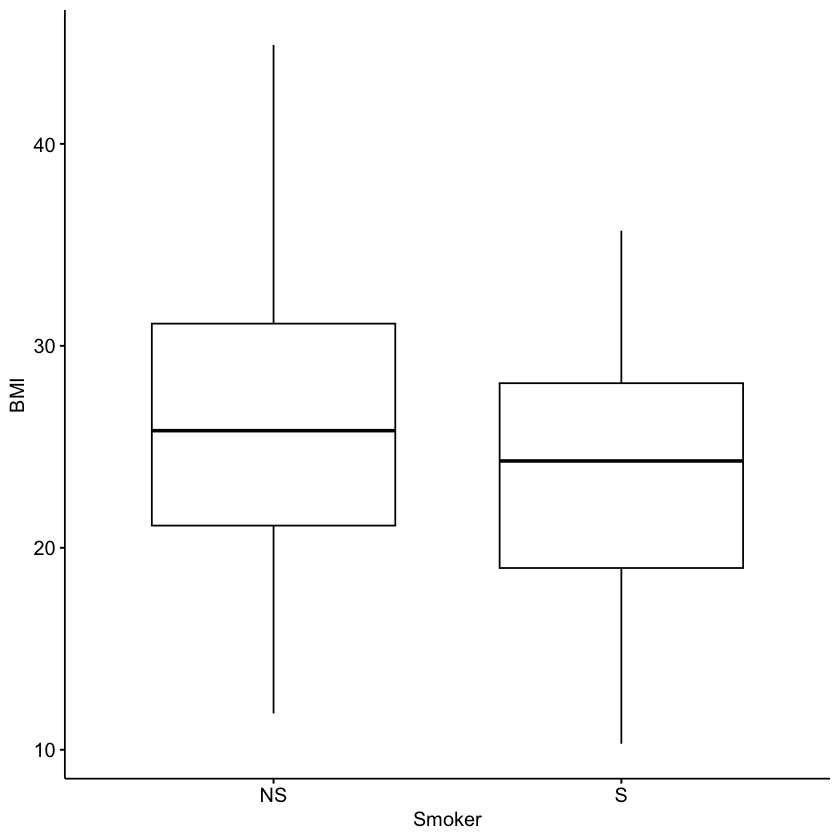

In [9]:
ggboxplot(data = full.data, x = "Smoker", y = "BMI")

From this plot, it looks like non-smokers (labeled "NS") *may* have significantly higher BMI than smokers (labeled "S"), though we need statistical evaluation of these data to more thoroughly evaluate this potential data trend.It is easy to perform a t-test on these data using the `t.test` function from the base R stats package:

In [10]:
t.test(data = full.data, BMI ~ Smoker)


	Welch Two Sample t-test

data:  BMI by Smoker
t = 2.5372, df = 80.362, p-value = 0.01311
alternative hypothesis: true difference in means between group NS and group S is not equal to 0
95 percent confidence interval:
 0.583061 4.823447
sample estimates:
mean in group NS  mean in group S 
        26.11176         23.40851 


*With this, we can answer **Environmental Health Question 1***: Are there statistically significant differences in BMI between non-smokers and smokers?

**Answer**: From this statistical output, we can see that the overall mean BMI in non-smokers (group "NS") is ~26, and the overall mean BMI in smokers (group "S") is ~23. We can also see that the resulting p-value comparison between the means of these two groups is, indeed, significant (p-value = 0.013), meaning that the means between these groups are significantly different (i.e., are not equal).


It's also helpful to save these results into a variable within the R global environment, which then allows us to access specific output values and extract them more easily for our records. For example, we can run the following to specifically extract the resulting p-value from this test:

In [11]:
ttest.res <- t.test(data = full.data, BMI ~ Smoker) # making a list in the R global environment with the statistical results
signif(ttest.res$p.value, 2) # pulling the p-value and using the `signif` function to round to 2 significant figures

[1] 0.013

<br>

## Three-Group Visualizations and Statistical Comparisons using	an ANOVA
Analysis of Variance (ANOVA) is a statistical method that can be used to compare means across three or more groups in normally distributed data. To demonstrate an ANOVA test on this dataset, let's answer **Environmental Health Question 2**: Are there statistically significant differences in BMI between current, former, and people who have never smoked? To do this we'll use the `Smoker3` variable from our dataset.

Let's again, start by viewing these data distributions using a boxplot:

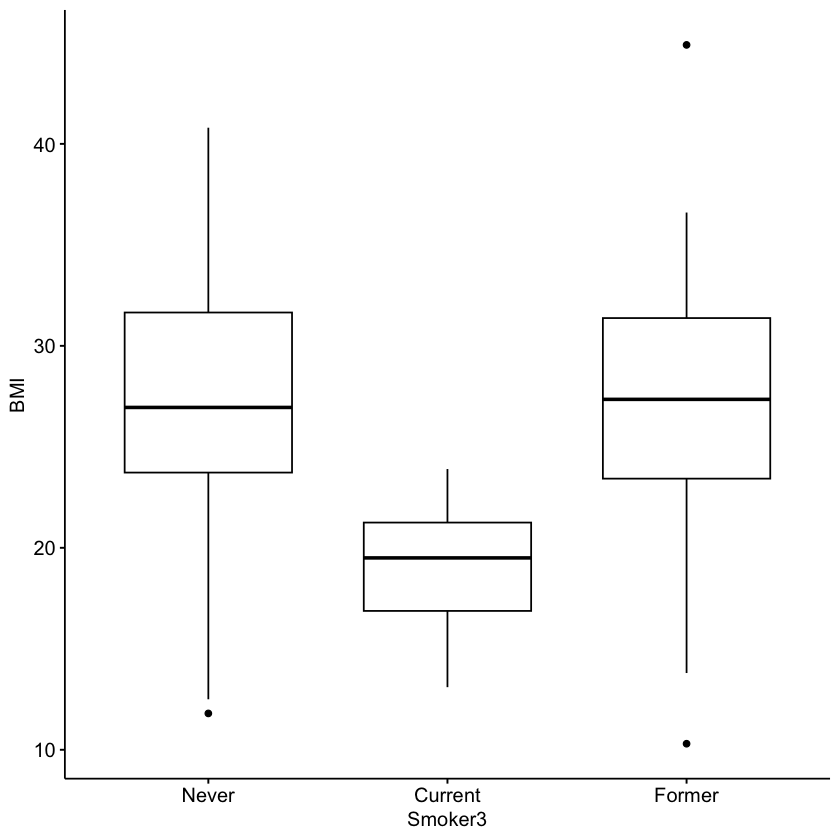

In [12]:
ggboxplot(data = full.data, x = "Smoker3", y = "BMI")

From this cursory review of the data, it looks like the current smokers likely demonstrate significantly different BMI measures than the former and never smokers, though we need statistical tests to verify this potential trend. We also require statistical tests to evaluate potential differences (or lack of differences) between former and never smokers.

Let’s now run the ANOVA to compare BMI between smoking groups, using the `aov` function to fit an ANOVA model:

In [25]:
full.data$Smoker3 = factor(full.data$Smoker3, levels = c("Never", "Former", "Current"))
smoker_anova = aov(data = full.data, BMI ~ Smoker3)
smoker_anova

Call:
   aov(formula = BMI ~ Smoker3, data = full.data)

Terms:
                 Smoker3 Residuals
Sum of Squares  2046.713  6817.786
Deg. of Freedom        2       197

Residual standard error: 5.882861
Estimated effects may be unbalanced

We need to extract the typical ANOVA results table using either the `summary` or `anova` function on the resulting fitted object:

In [26]:
anova(smoker_anova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Smoker3,2,2046.713,1023.35658,29.5699,5.887528e-12
Residuals,197,6817.786,34.60805,NA,NA


WONDERING IF AFTER THIS TABLE, THERE SHOULD BE A DESCRIPTION OF SOME OF THE ELEMENTS OTHER THAN Pr(>F)? OR MAYBE JUST A LINK TO LEARN MORE ABOUT THEM? SAME COMMENT FOR THE REGRESSION TABLES BELOW! ALEXIS HERE- I DIDN'T JUST BECAUSE I THINK IT'S SAFE TO ASSUME THAT THIS AUDIENCE UNDERSTANDS BASIC STATS AND SINCE THIS MODULE IS ON THE LONGER SIDE I DECIDED TO NOT TO TALK ABOUT THE COLUMN NAMES SINCE THEY SEEMED PRETTY INTUITIVE 


*With this, we can answer **Environmental Health Question 2***: Are there statistically significant differences in BMI between current, former, and people who have never smoked?

**Answer**: From this ANOVA output table, we can conclude that the group means across all three groups are not equal given that the p value, written as `Pr(>F)` is significant. However, it doesn't tell us which groups differ from each other and that's where post hoc tests like Tukey's are useful. 

Let's run a Tukey's post hoc test using the `TukeyHSD` function in base R to determine which of the current, former, and never smokers having significant differences in BMI:

In [27]:
TukeyHSD(smoker_anova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = BMI ~ Smoker3, data = full.data)

$Smoker3
                     diff        lwr       upr     p adj
Former-Never   -0.6731092  -3.357982  2.011764 0.8245448
Current-Never  -8.1167857 -10.638102 -5.595470 0.0000000
Current-Former -7.4436765 -10.684347 -4.203006 0.0000005


In [29]:
summary(glht(smoker_anova, linfct = mcp(Smoker3 ="Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = BMI ~ Smoker3, data = full.data)

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Former - Never == 0    -0.6731     1.1369  -0.592    0.822    
Current - Never == 0   -8.1168     1.0676  -7.603   <1e-05 ***
Current - Former == 0  -7.4437     1.3723  -5.424   <1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


<br>## Regression Modeling and Visualization: Linear and Logistic RegressionsRegression modeling aims to find a relationship between a dependent variable (or outcome, response, y) and an independent variable (or predictor, explanatory variable, x). There are many forms of regression analysis, but here we will focus on two: linear regression and logistic regression.In brief, **linear regression** is generally used when you have a continuous dependent variable and there is assumed to be some sort of linear relationship between the dependent and independent variables. Conversely, **logistic regression** is often used when the dependent variable is dichotomous.Let's first run through an example linear regression model to answer **Environmental Health Question 3**: Is there a relationship between maternal BMI and birth weight?### Linear RegressionWe will first visualize the data and a run simple correlation analysis to evaluate whether these data are generally correlated. Then, we will run a linear regression to evaluate the relationship between these variables in more detail. 


Plotting the variables against one another and adding a linear regression line using the function `ggscatter` from the `ggpubr` package:

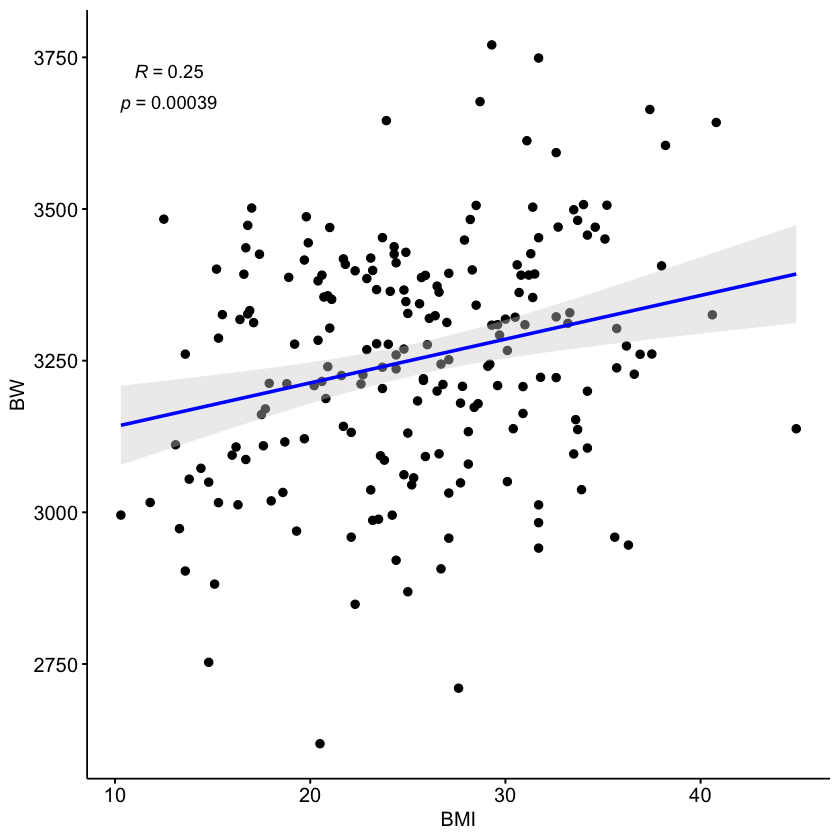

In [15]:
ggscatter(full.data, x = "BMI", y = "BW", 
          # Adding a linear line with 95% condfidence intervals as the shaded region
          add = "reg.line", conf.int = TRUE, 
          # Customize reg. line
          add.params = list(color = "blue", fill = "lightgray"), 
          # Adding Pearson's correlation coefficient
          cor.coef = TRUE, cor.method = "pearson", cor.coeff.args = list(label.sep = "\n")) 

We can also run a basic correlation analyses between these two variables using the `cor.test` function to extract the Pearson's correlation coefficient and p-value (which also appear above in the upper left corner of the graph):

In [16]:
cor.res <- cor.test(full.data$BW, full.data$BMI)
signif(cor.res$estimate, 2)
signif(cor.res$p.value, 2)

cor 
0.25

[1] 0.00039

Together, it looks like there may be a association between BW and BMI, based on these correlation results, demonstrating a significant p-value of 0.0004.

To test this further, let’s run a linear regression analysis using the `lm` function, using BMI (X) as the independent variable and BW as the dependent variable (Y):

In [17]:
crude_lm <- lm(data = full.data, BW ~ BMI)
summary(crude_lm) # viewing the results summary


Call:
lm(formula = BW ~ BMI, data = full.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-598.39 -116.72    8.11  136.54  490.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3069.201     52.576   58.38  < 2e-16 ***
BMI            7.208      1.997    3.61 0.000388 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 188 on 198 degrees of freedom
Multiple R-squared:  0.06176,	Adjusted R-squared:  0.05702 
F-statistic: 13.03 on 1 and 198 DF,  p-value: 0.0003876


*With this, we can answer **Environmental Health Question 3***: Is there a relationship between maternal BMI and birth weight?

**Answer**: Not only is there a slight positive correlation between maternal BMI and BW as indicated by ~0.25 correlation coefficient, this linear relationship is significant due to the p-value being ~0.0004. 

DO YOU WANT TO ADD ANYTHING ON SPEARMAN VS PEARSON CORRELATION? ALEXIS HERE - I DECIDED NOT TO DUE TO SPACE...IT SEEMED EASIER TO ONLY DISCUSS TESTS TYPICALLY USED FOR NORMALIZED DATA...MAYBE I CAN ADD A PARAGRAPH AT THE END THAT PROVIDES NON PARAMETRIC TESTS OPTIONS IN THE EVENT THAT THE DATA ISN'T NORMAL FOR THE PARAMETRIC TESTS MENTIONED HERE.

Additionally, we can also derive confidence intervals for the BMI estimate using:

In [18]:
confint(crude_lm)["BMI",]

2.5 %    97.5 % 
 3.270873 11.145740

Notice that the r-squared (R^2) value in regression output is the squared value of the previously calculated correlation coefficient (R).

In [19]:
signif(sqrt(summary(crude_lm)$r.squared), 2)

[1] 0.25

<br>

In epidemiological studies, the potential influence of confounders is considered by including important covariates within the final regression model. Let's go ahead and investigate **Environmental Health Question 4**: Are maternal age and gestational age considered to be potential covariates in the relationship between maternal BMI and birth weight? We can do that by adding those variables to the linear model.

In [20]:
adjusted_lm = lm(data = full.data, BW ~ BMI + MAge + GA)
summary(adjusted_lm)


Call:
lm(formula = BW ~ BMI + MAge + GA, data = full.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-454.04 -111.24    5.79  116.46  488.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2247.995    117.946  19.060  < 2e-16 ***
BMI            6.237      1.774   3.515 0.000547 ***
MAge           4.269      1.887   2.263 0.024752 *  
GA            19.612      2.656   7.385 4.28e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 165.5 on 196 degrees of freedom
Multiple R-squared:  0.2805,	Adjusted R-squared:  0.2695 
F-statistic: 25.47 on 3 and 196 DF,  p-value: 5.884e-14


<br>

Let's further visualize these regression modeling results by adding a regression line to the original scatterplot. Before doing so, we'll use the `effect` function from the `effects` package to make estimated predictions of birth weight values for the crude and adjusted linear models. The crude model only has BMI has the dependent variable, while the adjusted model includes BMI, maternal age, and gestational age as dependent variables. This function creates a table that contains 5 columns: fitted values for BMI (`BMI`), predictor values (`fit`), standard errors of the predictions (`se`), lower confidence limits (`lower`), and upper confidence limits (`upper`). An additional column, `Model`, was added to specify whether the values correspond to the crude or adjusted model. 

For additional information on visualizing adjusted linear models, see [Plotting Adjusted Associations in R](https://nickmichalak.com/post/2019-02-13-plotting-adjusted-associations-in-r/plotting-adjusted-associations-in-r/).

In [21]:
crude_lm_predtable = data.frame(effect(term = "BMI", mod = crude_lm), Model = "Crude") 
adjusted_lm_predtable = data.frame(effect(term = "BMI", mod = adjusted_lm), Model = "Adjusted") 

# Viewing one of the tables
crude_lm_predtable

,BMI,fit,se,lower,upper,Model
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,10,3141.284,33.63898,3074.948,3207.621,Crude
2,19,3206.159,18.54497,3169.588,3242.730,Crude
3,28,3271.034,14.21563,3243.000,3299.067,Crude
4,36,3328.700,24.86346,3279.669,3377.732,Crude
5,45,3393.575,41.18575,3312.356,3474.794,Crude


Now we can plot each linear model and their corresponding 95% confidence intervals (CI). It's easier to visualize this using `ggplot` instead of `ggpubr` so that's what we'll use: 

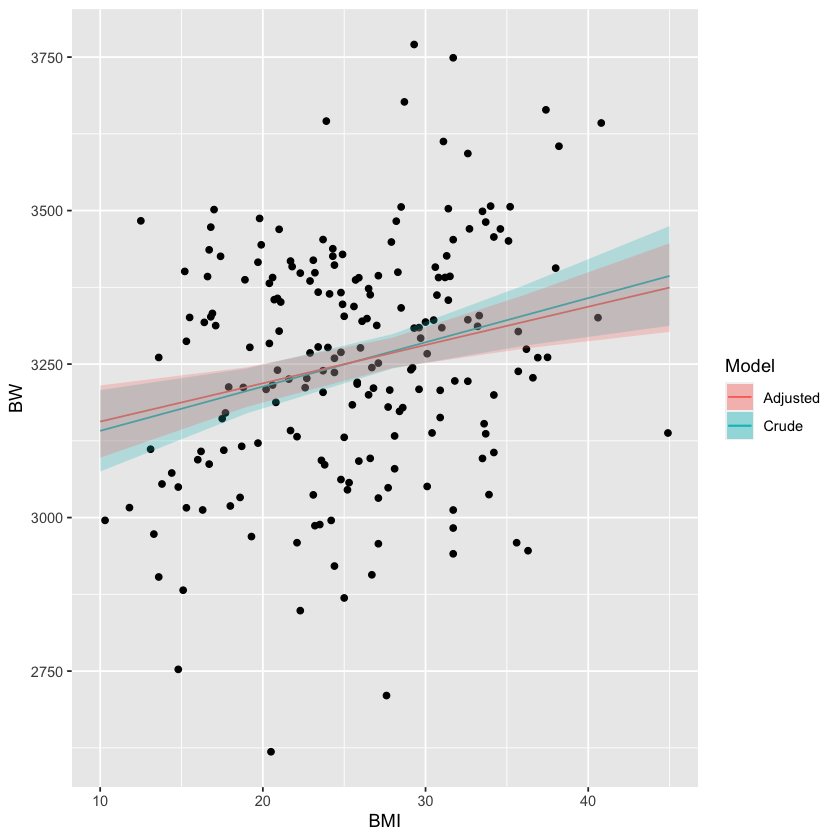

In [22]:
ggplot(full.data, aes(x = BMI, y = BW)) + 
  geom_point() + 
  # Crude line
  geom_line(data = crude_lm_predtable, mapping = aes(x = BMI, y = fit, color = Model)) +
  # Adjusted line
  geom_line(data = adjusted_lm_predtable, mapping = aes(x = BMI, y = fit, color = Model)) +
  # Crude 95% CI
  geom_ribbon(data = crude_lm_predtable, mapping = aes(x = BMI, y = fit, ymin = lower, ymax = upper, fill = Model), alpha = 0.25) + 
  # Adjusted 95% CI
  geom_ribbon(data = adjusted_lm_predtable, mapping = aes(x = BMI, y = fit, ymin = lower, ymax = upper, fill = Model), alpha = 0.25)

*With this, we can answer **Environmental Health Question 4***: Are maternal age and gestational age considered to be potential covariates in the relationship between maternal BMI and birth weight?

**Answer**: BMI is still significantly associated with BW and the included covariates are also shown to be significantly related to birth weight in this model. However, the addition of gestational age and maternal age did not have much of an impact on modifying the relationship between BMI and birth weight.

<br>

### Logistic Regression
To carry out a logistic regression, we need to evaluate one continuous variable (here, we select material education, using the `MEdu` variable) and one dichotomous variable (here, we select smoking status, using the `Smoker` variable) to evaluate **Environmental Health Question 5**: Are there statistically significant differences in maternal education level based on whether they are a non-smoker or a smoker?

When considering these data, we may hypothesize that higher levels of education are negatively associated with smoking status. In other words, those with higher education are less likely to smoke. Because smoking status is a dichotomous variable, we will use logistic regression to look at this relationship.

Let's first visualize these data using a boxplot for the dichotomous smoker dataset:

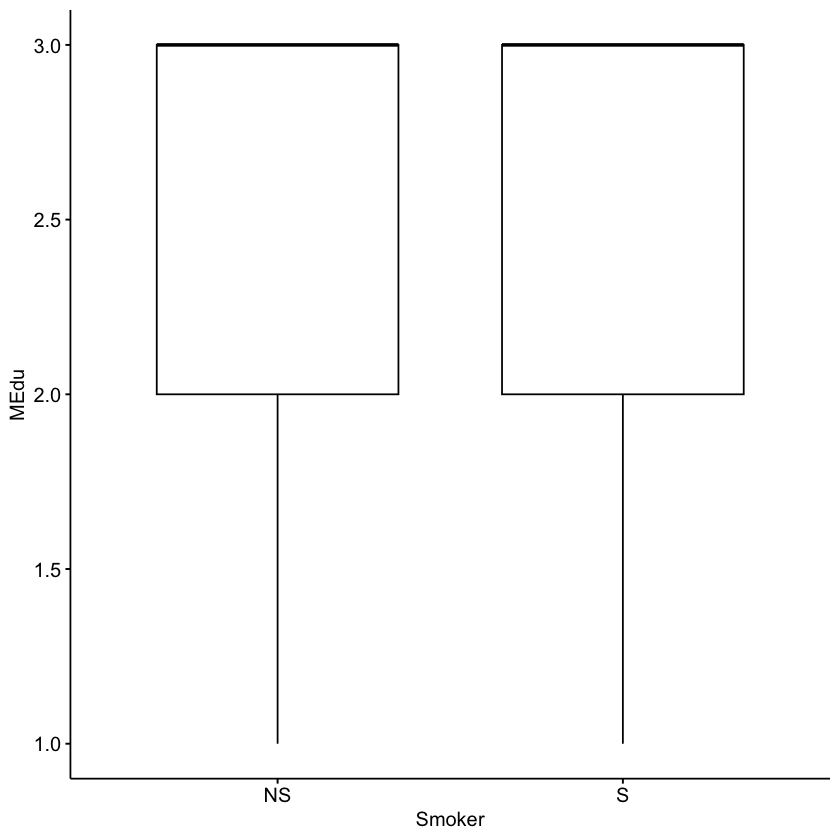

In [23]:
ggboxplot(data = full.data, x = "Smoker", y = "MEdu")

<br>
With this visualization, it's difficult to tell whether or not there are significant differences in maternal education based on smoking status.
<br>

Let's now run the statistical analysis, using logistic regression modeling:

In [24]:
# Before running the model, "Smoker", needs to binarized to 0's or 1's for the glm function
glm_data = full.data %>%
    mutate(Smoker = ifelse(Smoker == "NS", 0,1))

# use GLM (generalized linear model) and specify the family as binomial
# this tells GLM to run a logistic regression
log.res = glm(Smoker ~ MEdu, family = "binomial", data = glm_data)

summary(log.res) # viewing the results


Call:
glm(formula = Smoker ~ MEdu, family = "binomial", data = glm_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.7172     0.6031  -1.189    0.234
MEdu         -0.1826     0.2305  -0.792    0.428

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 218.10  on 199  degrees of freedom
Residual deviance: 217.49  on 198  degrees of freedom
AIC: 221.49

Number of Fisher Scoring iterations: 4


Similar to the regression modeling analysis, we can also derive confidence intervals:
WHEN I RAN THIS I GOT AN ERROR THAT THE SUBSCRIPT WAS OUT OF BOUNDS. WHEN I CHANGED IT TO EACH OF THE COEFFICIENTS, IT SEEMED TO WORK. ALEXIS HERE- THIS IS KYLE'S CODE SO I KNOW IT WORKED FOR HIM AND I DON'T GET ANY ERRORS WHEN I RUN THE CODE BELOW SO I'M NOT SURE WHAT TO DO HERE

In [25]:
confint(log.res)["MEdu",]

Waiting for profiling to be done...



2.5 %     97.5 % 
-0.6262616  0.2839524

*With this, we can answer **Environmental Health Question 5***: Are there statistically significant differences in maternal education level based on whether they are a non-smoker or a smoker?

**Answer**: Collectively, these results show a non-significant p-value relating maternal education to smoking status. The confidence intervals also overlap across zero. Therefore, these data do not demonstrate a significant association between maternal education and smoking status.

<br> <br>

##	Statistical Evaluations of Categorical Data using the Chi-Squared Test and Fisher's Exact Test
Chi-squared test and Fisher's exact tests are used primarily when evaluating data distributions between two categorical variables. 
The difference between a Chi-squared test and the Fisher's exact test surrounds the specific procedure being run. The [Chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test) is an approximation and is run with larger sample sizes to determine whether there is a statistically significant difference between the expected vs. observed frequencies in one or more categories of a contingency table. The [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) is similar, though is an exact measure that can be run on any sample size, including smaller sample sizes.  I THINK LESS THAN 50 IS CONSIDERED SMALL?

For this example, we are interested in evaluating the potential relationship between two categorical variables: smoking status (using the `Smoker` variable) and categorical BMI group (using the `BMIcat` variable) to address **Environmental Health Question 6**: Is there a relationship between smoking status and BMI?

To run these categorical statistical tests, let's first create and view a 2-way contingency table, describing the frequencies of observations across the categorical BMI and smoking groups:

In [26]:
ContingencyTable <- with(full.data, table(BMIcat, Smoker))
ContingencyTable

             Smoker
BMIcat        NS  S
  Normal      43 14
  Overweight  87 22
  Underweight 23 11

Now let's run the Chi-squared test on this table:

In [27]:
chisq.test(ContingencyTable)


	Pearson's Chi-squared test

data:  ContingencyTable
X-squared = 2.1849, df = 2, p-value = 0.3354


Note that we can also run the Chi-squared test using the following code, without having to generate the contingency table:

In [28]:
chisq.test(full.data$BMI, full.data$Smoker)

Warning message in chisq.test(full.data$BMI, full.data$Smoker):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  full.data$BMI and full.data$Smoker
X-squared = 143.17, df = 144, p-value = 0.5039


Or:

In [29]:
with(full.data, chisq.test(BMI, Smoker))

Warning message in chisq.test(BMI, Smoker):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  BMI and Smoker
X-squared = 143.17, df = 144, p-value = 0.5039


Note that these all produce the same results. *With this, we can answer **Environmental Health Question 6***: Is there a relationship between smoking status and BMI?

**Answer**: This results in a p-value = 0.34, demonstrating that there is no significant relationship between BMI categories and smoking status.

<br>
We can also run a Fisher's Exact Test when considering smaple cell sizes. We won't run this here due to computing time, but here is some example code for your records:

In [30]:
#With small cell sizes, can use Fisher's Exact Test
#fisher.test(full.data$BMI, full.data$Smoker)

# Concluding Remarks
In conclusion, this training module serves as a high-level introduction to basic statistics and visualization methods. Statistical approaches described in this training module include tests for normality, t-test, analysis of variance, regression modeling, chi-squared test, and Fischer’s exact test. Visualization approaches include boxplots, histograms, scatterplots, and regression lines. These methods serve as an important foundation for nearly all studies carried out in environmental health research.
<br>

# Test Your Knowledge
1. If we're interested in investigating the relationship between birth weight and maternal education, which statistical test should you use?
2. Is that relationship considered to be statistically significant and how can we visualize the distributions of these groups?